# Anomaly Detection Project

## Project Overview

- In this project, I will be answering questions about codeup

## Project Description

- I will be exploring data in regards to codeup access to the curriculum and answering important questions

## Project Goal
- Goals: exploring codeup dataset

## Executive Summary
1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?
- PHP Full Stack Web Development accessed the javascript-i the most
- Java Full Stack Web Development accessed the javascript-i the most
- Data Science accessed the classification overview the most

2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?
- Cohort #33 Ceres

3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?
- users 832, 97, 348, 813, and 169 were the least to access the curriculum
- user 813 accessed the most amoung the group
- user 813 is part of the data science program group


4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?

- In the case of our largest potential anomaly (271 count, user_id 341), this happened in the middle of the cohort

- The IP address used was not in regular use before accessing these pages. 


- However, 204.44.122.76 ONLY appears on the date during which the 271 page count occurs. 173.174.243.231 also is active on this date and both appear to be iterating through the curriculum pages.

- Timestamps for both IPs a definitive

- 204... multiple equivalent timestamps seperated by milliseconds suggesting the download automated/algo and not manual effort

- 172.124.40.146 appears on 4/21/20 and visits an anomalous amount of pages (96)


- Timestamps suggest it was an automated/algo and not manual effort

5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?

- It looks like every January the access to codeup drops to zero. Not sure if that is because of the holidays or maintenance


6. Which lessons are least accessed?

- Ignoring indices, github addresses, git files the following are the lease accessed: fundamentals/2.4-more-excel-features, 10-anomaly-detection/2-continuous-probabilistic... , 12-distributed-ml/3-getting-started




In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import env
from acquire import new_curriculum_logs_data, get_curriculum_logs_data
from prepare import prepare_codeup, prep, compute_pct_b, find_anomalies, plt_bands
import warnings
warnings.filterwarnings("ignore")

# Acquire 

In [2]:
# acquire the codeup access logs from sequel
df = get_curriculum_logs_data()

In [3]:
df

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847325,2021-04-21,16:41:51,jquery/personal-site,64,28.0,71.150.217.33,28,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,NaN,2
847326,2021-04-21,16:42:02,jquery/mapbox-api,64,28.0,71.150.217.33,28,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,NaN,2
847327,2021-04-21,16:42:09,jquery/ajax/weather-map,64,28.0,71.150.217.33,28,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,NaN,2
847328,2021-04-21,16:44:37,anomaly-detection/discrete-probabilistic-methods,744,28.0,24.160.137.86,28,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,NaN,2


# Prepare 

In [4]:
df = prepare_codeup(df)
df

,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,program_id
timestamp,,,,,,,,,,,,
2018-01-26 09:56:02,java-ii,1,8,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1
2018-01-26 09:56:06,slides/object_oriented_programming,1,8,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1
2018-01-26 09:56:24,javascript-i/conditionals,2,22,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2
2018-01-26 09:56:41,javascript-i/loops,2,22,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-21 16:41:51,jquery/personal-site,64,28,71.150.217.33,28,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,2
2021-04-21 16:42:02,jquery/mapbox-api,64,28,71.150.217.33,28,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,2
2021-04-21 16:42:09,jquery/ajax/weather-map,64,28,71.150.217.33,28,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,2


### Takeaways and prep

 - The '/' was removed which the user only access ds.codeup.com
 - All null and NAN's were removed
 - date and time combined and renamed to timestamp
 - timestamp used as my index
 - converted cohort_id to an integer
 - Program 4 was excluded as it only had 5 observations

# Explore and Answer 

1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?
- PHP Full Stack Web Development accessed the javascript-i the most
- Java Full Stack Web Development accessed the javascript-i the most
- Data Science accessed the classification overview the most

In [5]:
# loop through all Programs grouping by program_id and pulling 7 largest path counts
pd.set_option('display.max_rows', None)
program_list = [1, 2, 3]

for p in program_list:
        
        prog_df = pd.DataFrame(df).groupby('program_id')['path'].value_counts()
        p_df = prog_df.loc[[p]]
        p_df = pd.DataFrame(p_df.nlargest(15))
        print(p_df)

                                                               path
program_id path                                                    
1          index.html                                          1011
           javascript-i                                         736
           html-css                                             542
           spring                                               501
           java-iii                                             479
           java-ii                                              454
           java-i                                               444
           javascript-ii                                        429
           appendix                                             409
           jquery                                               344
           mysql                                                284
           content/html-css                                     262
           javascript-i/introduction/working-wit

2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

- Cohort #33 Ceres

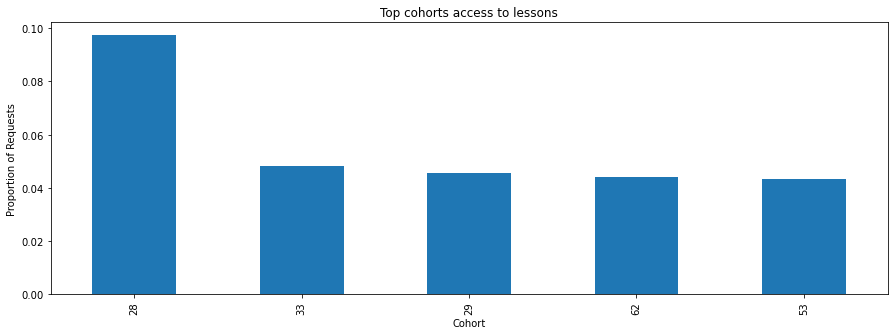

In [6]:
df[(df.path != '/') & (df.path != 'search/search_index.json')]['cohort_id'].value_counts(normalize=True).head(5).plot.bar(figsize=(15,5))
plt.title('Top cohorts access to lessons')
plt.xlabel('Cohort')
plt.ylabel('Proportion of Requests');

3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?

- users 832, 97, 348, 813, and 169 were the least to access the curriculum
- user 813 accessed the most amoung the group since they are considered staff
- user 97 is part of the Java group

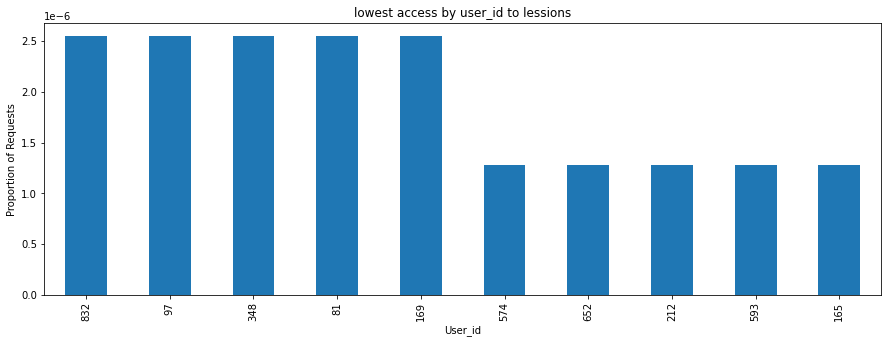

In [7]:
df[(df.path != '/') & (df.path != 'search/search_index.json')]['user_id'].value_counts(normalize=True).tail(10).plot.bar(figsize=(15,5))
plt.title('lowest access by user_id to lessions')
plt.xlabel('User_id')
plt.ylabel('Proportion of Requests');

In [8]:
# loop through all Programs grouping by program_id and pulling 7 largest path counts
pd.set_option('display.max_rows', None)
user_list = [832, 97, 348,813,169]

for u in user_list:
        
        use_df = pd.DataFrame(df).groupby('user_id')['path'].value_counts()
        use_df = use_df.loc[[u]]
        use_df = pd.DataFrame(use_df.nlargest(15))
        print(use_df)

                      path
user_id path              
832     html-css         1
        javascript-i     1
                      path
user_id path              
97      index.html       1
        javascript-i     1
                                                            path
user_id path                                                    
348     content/php_iii/php-with-html/sessions-with-php...     1
        toc                                                    1
                                                            path
user_id path                                                    
813     appendix/professional-development/professional-...    17
        toc                                                    3
        appendix                                               2
        appendix/professional-development/cover-letter-...     2
        appendix/professional-development/professionali...     2
        html-css                                               2
    

In [9]:
df[df.user_id == 97].head(30)

,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,program_id
timestamp,,,,,,,,,,,,
2018-02-11 20:24:07,index.html,97,16,66.25.81.21,16,Niagara,#niagara,2016-10-26,2017-03-09,2016-10-26 02:34:05,2016-10-26 14:30:19,2
2018-02-11 20:24:17,javascript-i,97,16,66.25.81.21,16,Niagara,#niagara,2016-10-26,2017-03-09,2016-10-26 02:34:05,2016-10-26 14:30:19,2


4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?

In [10]:
# loop the anomalies function through all user ids and identify potential anomalies
span = 30
weight = 3.5

anomalies = pd.DataFrame()
for u in list(df.user_id.unique()):
    user_df = find_anomalies(df, u, span, weight)
    anomalies = pd.concat([anomalies, user_df], axis=0)

In [11]:
# set list max option at unlimited and count the count of pages and the frequency 
pd.set_option('display.max_rows', None)
anomalies.pages.value_counts(sort=False).tail(10)

120    1
126    1
128    1
142    1
152    1
164    1
176    1
191    1
197    1
271    1
Name: pages, dtype: int64

In [12]:
# Identify the user id associated with the highest count
anomalies[anomalies.pages==271]

,pages,midband,ub,lb,pct_b,user_id
timestamp,,,,,,
2019-03-03,271,24.349712,265.673548,-216.974124,1.011036,341


In [13]:
# Utilize the user id to identify other potential associated anomalous activity
anomalies[anomalies.user_id==341]

,pages,midband,ub,lb,pct_b,user_id
timestamp,,,,,,
2019-03-03,271,24.349712,265.673548,-216.974124,1.011036,341
2020-02-18,2,0.129032,1.878126,-1.620061,1.034839,341
2020-03-10,3,0.225351,2.967734,-2.517032,1.005883,341
2020-04-21,96,6.332412,90.181178,-77.516354,1.034698,341
2021-02-09,9,0.594824,8.579927,-7.390279,1.026304,341


In [28]:
# pull all observations for user id 341.  Note: change max_rows number to 'None' to see all observations
pd.set_option('display.max_rows', None)
df[df.user_id==341]


,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,program_id
timestamp,,,,,,,,,,,,
2019-01-22 15:25:51,toc,341,29,97.105.19.58,29,Zion,#zion,2019-01-22,2019-06-04,2019-01-20 23:18:57,2019-01-20 23:18:57,2
2019-01-22 15:26:44,html-css,341,29,97.105.19.58,29,Zion,#zion,2019-01-22,2019-06-04,2019-01-20 23:18:57,2019-01-20 23:18:57,2
2019-01-22 15:28:33,html-css/introduction,341,29,97.105.19.58,29,Zion,#zion,2019-01-22,2019-06-04,2019-01-20 23:18:57,2019-01-20 23:18:57,2
2019-01-22 15:29:29,html-css/elements,341,29,97.105.19.58,29,Zion,#zion,2019-01-22,2019-06-04,2019-01-20 23:18:57,2019-01-20 23:18:57,2
2019-01-22 15:31:24,html-css/introduction,341,29,97.105.19.58,29,Zion,#zion,2019-01-22,2019-06-04,2019-01-20 23:18:57,2019-01-20 23:18:57,2
2019-01-22 15:31:32,html-css/forms,341,29,97.105.19.58,29,Zion,#zion,2019-01-22,2019-06-04,2019-01-20 23:18:57,2019-01-20 23:18:57,2
2019-01-22 15:33:40,html-css/css-i,341,29,97.105.19.58,29,Zion,#zion,2019-01-22,2019-06-04,2019-01-20 23:18:57,2019-01-20 23:18:57,2
2019-01-22 15:33:43,html-css/css-i/positioning,341,29,97.105.19.58,29,Zion,#zion,2019-01-22,2019-06-04,2019-01-20 23:18:57,2019-01-20 23:18:57,2
2019-01-22 15:33:49,html-css/introduction,341,29,97.105.19.58,29,Zion,#zion,2019-01-22,2019-06-04,2019-01-20 23:18:57,2019-01-20 23:18:57,2


- In the case of our largest potential anomaly (271 count, user_id 341), this happened in the middle of the cohort (3/03/2019)

- The IP address used was not in regular use before accessing these pages. 


- However, 204.44.122.76 ONLY appears on the date during which the 271 page count occurs. 173.174.243.231 also is active on this date and both appear to be iterating through the curriculum pages.

- Timestamps for both IPs a definitive

- 204... multiple equivalent timestamps seperated by milliseconds suggesting the download automated/algo and not manual effort

- 172.124.40.146 appears on 4/21/20 and visits an anomalous amount of pages (96)


- Timestamps suggest it was an automated/algo and not manual effort

5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?

- It looks like every January the access to codeup drops to zero. Not sure if that is because of the holidays or maintenance

In [15]:
pages = df['path'].resample('d').count()
pages.head()

timestamp
2018-01-26    489
2018-01-27    202
2018-01-28    143
2018-01-29    715
2018-01-30    586
Freq: D, Name: path, dtype: int64

<AxesSubplot:xlabel='timestamp'>

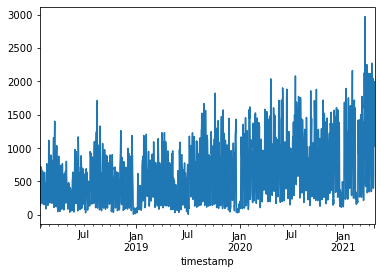

In [16]:
pages.plot()

6. Which lessons are least accessed?

-Ignoring indices, github addresses, git files the following are the lease accessed: fundamentals/2.4-more-excel-features, 10-anomaly-detection/2-continuous-probabilistic... , 12-distributed-ml/3-getting-started

In [17]:
# loop through all Programs grouping by program_id and list the least accessed lesson 
pd.set_option('display.max_rows', None)
program_list = [1, 2, 3]

for p in program_list:
        
        prog_df = pd.DataFrame(df).groupby('program_id')['path'].value_counts()
        p_df = prog_df.loc[[p]]
        p_df = pd.DataFrame(p_df.nsmallest(15))
        print(p_df)

                                                              path
program_id path                                                   
1          1-fundamentals/2.4-more-excel-features                1
           10-anomaly-detection/1-overview                       1
           10-anomaly-detection/AnomalyDetectionCartoon.jpeg     1
           10.2_Regex                                            1
           11._DistributedML                                     1
           11._DistributedML.md                                  1
           12.01_SocialNetworkAnalysis                           1
           13-advanced-topics/1-tidy-data                        1
           13.5_Tableau                                          1
           2-storytelling/1-overview                             1
           2-storytelling/2.1-understand                         1
           2-storytelling/2.2-create                             1
           2-storytelling/bad-charts                          

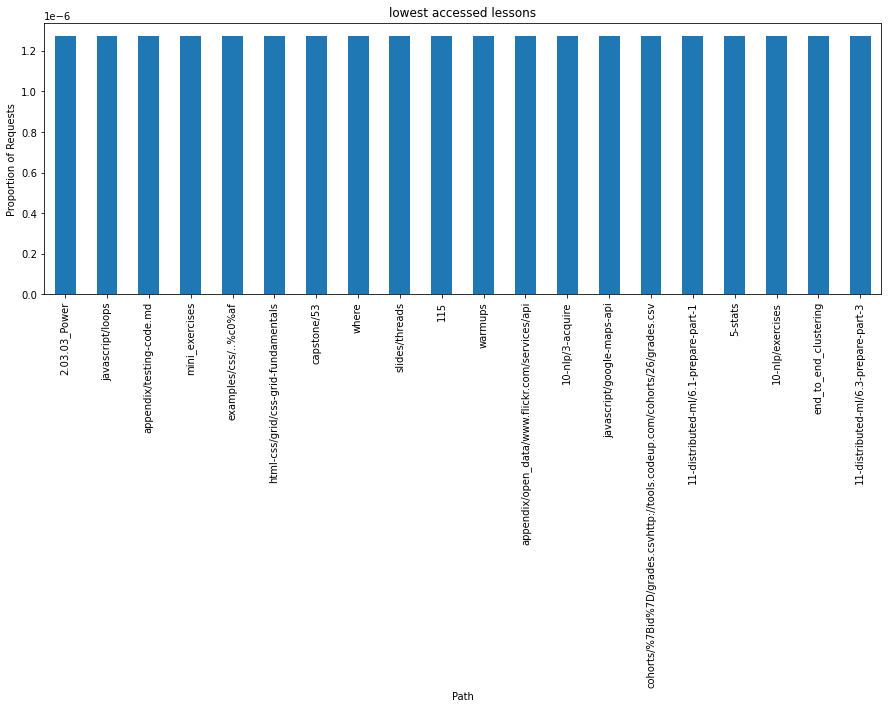

In [18]:
# plotted the paths using tail that were least accessed
df[(df.path != '/') & (df.path != 'search/search_index.json')]['path'].value_counts(normalize=True).tail(20).plot.bar(figsize=(15,5))
plt.title('lowest accessed lessons')
plt.xlabel('Path')
plt.ylabel('Proportion of Requests');